<p style="background-color:steelblue;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>Word Embedding - Word2Vec</b></p>

In [1]:
# pip install gensim

In [3]:
# If an error is received, this upgrade must be made.
# pip install --upgrade gensim

In [1]:
import numpy as np
from gensim.models import Word2Vec

We have a dataset consisting of 400,000 rows taken from newspapers, with the cleaning process completed.

---

To convert the text into a list of sentences, we split the text using __split__. Then, using a for loop, we divided the sentences into words and assigned them to the corpus variable:

In [3]:
text = open('test.txt', 'r', encoding='utf8')       # Be sure to write utf8.  #r=read
text = text.read()
list_sent = text.split('\n')

corpus = []

for sent in list_sent:
    corpus.append(sent.split())                      # split performs the separation operation starting from each space.

In [5]:
text

'Vakfiye: Sabık Karaman Beyi Mahmud Beyzade merhum Halil Bey oğlu Alaaddin Bey\'in mahdumu Alaaddin Bey\'in, Niğde\'de tesis etmiş olduğu muazzam medrese ve mescid için, mezkur şehir mülhakatından olup tasarrufunda bulunan karyeleri, mezraları, hamamları,dükkanları, emval ve araziyi vakfedip, medrese müderrisi, hademesi, mescid imam ve müezzini vesaireyi vakıf memur ve müstahdemini vazifelerinin tesviyesinden, vakıf parasının murabahasından artan paranın, Mekke, Medine ve Kudüs ahalisi fukarasına tahsisini şart koştuğuna ve vakıf mütevellisi ile emlak ve akarın tamiri, termimi vesaireye dair.\nŞehabeddin Şah Melek b. Şadi Vakfiyesi: Edirne içinde Yahşi Fakih Hamamı kurbunda birbirine muttasıl üç dükkanı, Edirne dışında Mevlana Cercafi mescidi kurbunda iki dükkanı, başka bir evi, mezkur mescidde her gün imam ve mü\'ezzin tarafından vâkıfın ruhuna birer cüz\' okunması için Edirne içinde Bakırcılar Çarşısı\'nda vaki oniki dükkanı, yine Bakırcılar Hanı kurbunda dört dükkanla üç odayı, Edir

In [7]:
list_sent  

["Vakfiye: Sabık Karaman Beyi Mahmud Beyzade merhum Halil Bey oğlu Alaaddin Bey'in mahdumu Alaaddin Bey'in, Niğde'de tesis etmiş olduğu muazzam medrese ve mescid için, mezkur şehir mülhakatından olup tasarrufunda bulunan karyeleri, mezraları, hamamları,dükkanları, emval ve araziyi vakfedip, medrese müderrisi, hademesi, mescid imam ve müezzini vesaireyi vakıf memur ve müstahdemini vazifelerinin tesviyesinden, vakıf parasının murabahasından artan paranın, Mekke, Medine ve Kudüs ahalisi fukarasına tahsisini şart koştuğuna ve vakıf mütevellisi ile emlak ve akarın tamiri, termimi vesaireye dair.",
 "Şehabeddin Şah Melek b. Şadi Vakfiyesi: Edirne içinde Yahşi Fakih Hamamı kurbunda birbirine muttasıl üç dükkanı, Edirne dışında Mevlana Cercafi mescidi kurbunda iki dükkanı, başka bir evi, mezkur mescidde her gün imam ve mü'ezzin tarafından vâkıfın ruhuna birer cüz' okunması için Edirne içinde Bakırcılar Çarşısı'nda vaki oniki dükkanı, yine Bakırcılar Hanı kurbunda dört dükkanla üç odayı, Edirne

After the splitting operation, we now have a list consisting of sentences:

In [9]:
list_sent[:17]

["Vakfiye: Sabık Karaman Beyi Mahmud Beyzade merhum Halil Bey oğlu Alaaddin Bey'in mahdumu Alaaddin Bey'in, Niğde'de tesis etmiş olduğu muazzam medrese ve mescid için, mezkur şehir mülhakatından olup tasarrufunda bulunan karyeleri, mezraları, hamamları,dükkanları, emval ve araziyi vakfedip, medrese müderrisi, hademesi, mescid imam ve müezzini vesaireyi vakıf memur ve müstahdemini vazifelerinin tesviyesinden, vakıf parasının murabahasından artan paranın, Mekke, Medine ve Kudüs ahalisi fukarasına tahsisini şart koştuğuna ve vakıf mütevellisi ile emlak ve akarın tamiri, termimi vesaireye dair.",
 "Şehabeddin Şah Melek b. Şadi Vakfiyesi: Edirne içinde Yahşi Fakih Hamamı kurbunda birbirine muttasıl üç dükkanı, Edirne dışında Mevlana Cercafi mescidi kurbunda iki dükkanı, başka bir evi, mezkur mescidde her gün imam ve mü'ezzin tarafından vâkıfın ruhuna birer cüz' okunması için Edirne içinde Bakırcılar Çarşısı'nda vaki oniki dükkanı, yine Bakırcılar Hanı kurbunda dört dükkanla üç odayı, Edirne

In [11]:
list_sent[2].split()

['Fazlullah',
 'Paşa',
 'b.',
 'Hacı',
 'İlyas',
 'bin',
 "Akçakoca'nın,",
 'Gebze',
 "(Gekboze)'de",
 'bina',
 'ettiği',
 'tekkenin',
 'masraflarını',
 'karşılamak',
 'için',
 'kendi',
 'mülkü',
 'olan',
 'Çenki',
 "Köyü'nü",
 '(Çengelköyü),',
 'Fendik',
 'köyünü,',
 'haracları,',
 'ispençleri',
 've',
 'bütün',
 'rüsumiyle',
 've',
 'hududları',
 'tarif',
 'edilen',
 'tekke',
 'önündeki',
 'mülk',
 'bağını,',
 'harman',
 've',
 'tekke',
 'tarlası',
 'isimli',
 'tarlalarını,',
 "Hereke'deki",
 'değirmenini',
 've',
 'önündeki',
 'mahzen,',
 'anbar',
 've',
 'iskelesini,',
 "Gebze'deki",
 'dükkanlarını',
 've',
 'sair',
 'bazı',
 'yerlerini,',
 'vakfın',
 'idaresine,',
 'varidatın',
 'suret-i',
 'sarfına',
 've',
 'hayatta',
 'iken',
 'kendi',
 'tasarrufunda',
 'olan',
 'vakfın',
 'vefatından',
 'sonra',
 'kimlere',
 'intikal',
 'edeceğine',
 'dair',
 'vakfiyesi.']

Each sentence inside the corpus is now split into tokens within a list:

In [13]:
print(corpus)

[['Vakfiye:', 'Sabık', 'Karaman', 'Beyi', 'Mahmud', 'Beyzade', 'merhum', 'Halil', 'Bey', 'oğlu', 'Alaaddin', "Bey'in", 'mahdumu', 'Alaaddin', "Bey'in,", "Niğde'de", 'tesis', 'etmiş', 'olduğu', 'muazzam', 'medrese', 've', 'mescid', 'için,', 'mezkur', 'şehir', 'mülhakatından', 'olup', 'tasarrufunda', 'bulunan', 'karyeleri,', 'mezraları,', 'hamamları,dükkanları,', 'emval', 've', 'araziyi', 'vakfedip,', 'medrese', 'müderrisi,', 'hademesi,', 'mescid', 'imam', 've', 'müezzini', 'vesaireyi', 'vakıf', 'memur', 've', 'müstahdemini', 'vazifelerinin', 'tesviyesinden,', 'vakıf', 'parasının', 'murabahasından', 'artan', 'paranın,', 'Mekke,', 'Medine', 've', 'Kudüs', 'ahalisi', 'fukarasına', 'tahsisini', 'şart', 'koştuğuna', 've', 'vakıf', 'mütevellisi', 'ile', 'emlak', 've', 'akarın', 'tamiri,', 'termimi', 'vesaireye', 'dair.'], ['Şehabeddin', 'Şah', 'Melek', 'b.', 'Şadi', 'Vakfiyesi:', 'Edirne', 'içinde', 'Yahşi', 'Fakih', 'Hamamı', 'kurbunda', 'birbirine', 'muttasıl', 'üç', 'dükkanı,', 'Edirne', '

In [15]:
from collections import defaultdict

# Create a dictionary to store frequencies
word_freq = defaultdict(int)

# Calculate word frequencies in the corpus
for sentence in corpus:
    for word in sentence:
        word_freq[word] += 1

# Display the frequencies
for word, freq in word_freq.items():
    print(f"{word}: appears {freq} times")

Vakfiye:: appears 8 times
Sabık: appears 5 times
Karaman: appears 4 times
Beyi: appears 4 times
Mahmud: appears 27 times
Beyzade: appears 1 times
merhum: appears 33 times
Halil: appears 8 times
Bey: appears 58 times
oğlu: appears 30 times
Alaaddin: appears 3 times
Bey'in: appears 29 times
mahdumu: appears 3 times
Bey'in,: appears 10 times
Niğde'de: appears 1 times
tesis: appears 9 times
etmiş: appears 6 times
olduğu: appears 22 times
muazzam: appears 2 times
medrese: appears 14 times
ve: appears 2245 times
mescid: appears 15 times
için,: appears 21 times
mezkur: appears 41 times
şehir: appears 3 times
mülhakatından: appears 20 times
olup: appears 24 times
tasarrufunda: appears 17 times
bulunan: appears 118 times
karyeleri,: appears 2 times
mezraları,: appears 2 times
hamamları,dükkanları,: appears 1 times
emval: appears 9 times
araziyi: appears 9 times
vakfedip,: appears 11 times
müderrisi,: appears 1 times
hademesi,: appears 2 times
imam: appears 7 times
müezzini: appears 2 times
vesa

In [17]:
from collections import Counter

# Combine all words
all_words = [word for sentence in corpus for word in sentence]

# Calculate frequencies
word_freq = Counter(all_words)

# Display frequencies
for word, freq in word_freq.items():
    print(f"{word}: appears {freq} times")

Vakfiye:: appears 8 times
Sabık: appears 5 times
Karaman: appears 4 times
Beyi: appears 4 times
Mahmud: appears 27 times
Beyzade: appears 1 times
merhum: appears 33 times
Halil: appears 8 times
Bey: appears 58 times
oğlu: appears 30 times
Alaaddin: appears 3 times
Bey'in: appears 29 times
mahdumu: appears 3 times
Bey'in,: appears 10 times
Niğde'de: appears 1 times
tesis: appears 9 times
etmiş: appears 6 times
olduğu: appears 22 times
muazzam: appears 2 times
medrese: appears 14 times
ve: appears 2245 times
mescid: appears 15 times
için,: appears 21 times
mezkur: appears 41 times
şehir: appears 3 times
mülhakatından: appears 20 times
olup: appears 24 times
tasarrufunda: appears 17 times
bulunan: appears 118 times
karyeleri,: appears 2 times
mezraları,: appears 2 times
hamamları,dükkanları,: appears 1 times
emval: appears 9 times
araziyi: appears 9 times
vakfedip,: appears 11 times
müderrisi,: appears 1 times
hademesi,: appears 2 times
imam: appears 7 times
müezzini: appears 2 times
vesa

In [19]:
from collections import Counter

# Combine all words
all_words = [word for sentence in corpus for word in sentence]

# Calculate frequencies
word_freq = Counter(all_words)

# Sort frequencies in descending order
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True))

# Display sorted frequencies
for word, freq in sorted_word_freq.items():
    print(f"{word}: appears {freq} times")

ve: appears 2245 times
defteri:: appears 514 times
masraf: appears 332 times
a.g.tt: appears 309 times
defteri.: appears 258 times
Sultan: appears 218 times
ile: appears 192 times
için: appears 190 times
inşaatı: appears 177 times
Süleymaniye: appears 177 times
Camii: appears 175 times
acemi: appears 160 times
aldıkları: appears 159 times
çalışan: appears 159 times
marangoz,: appears 158 times
müfredatlı: appears 155 times
taşçı,: appears 154 times
oğlanlarının: appears 154 times
lağımcı,: appears 153 times
demirci,: appears 153 times
İnşaatta: appears 153 times
işleri: appears 153 times
yevmiyelerin: appears 153 times
duvarcı,: appears 152 times
bıçkıcı,: appears 152 times
kurşuncu,: appears 152 times
sırt: appears 152 times
hammalı,: appears 152 times
ırgat,: appears 152 times
sayıları,: appears 152 times
bir: appears 137 times
olan: appears 129 times
edilen: appears 127 times
Paşa: appears 122 times
bulunan: appears 118 times
ait: appears 110 times
havi: appears 101 times
verilen: a

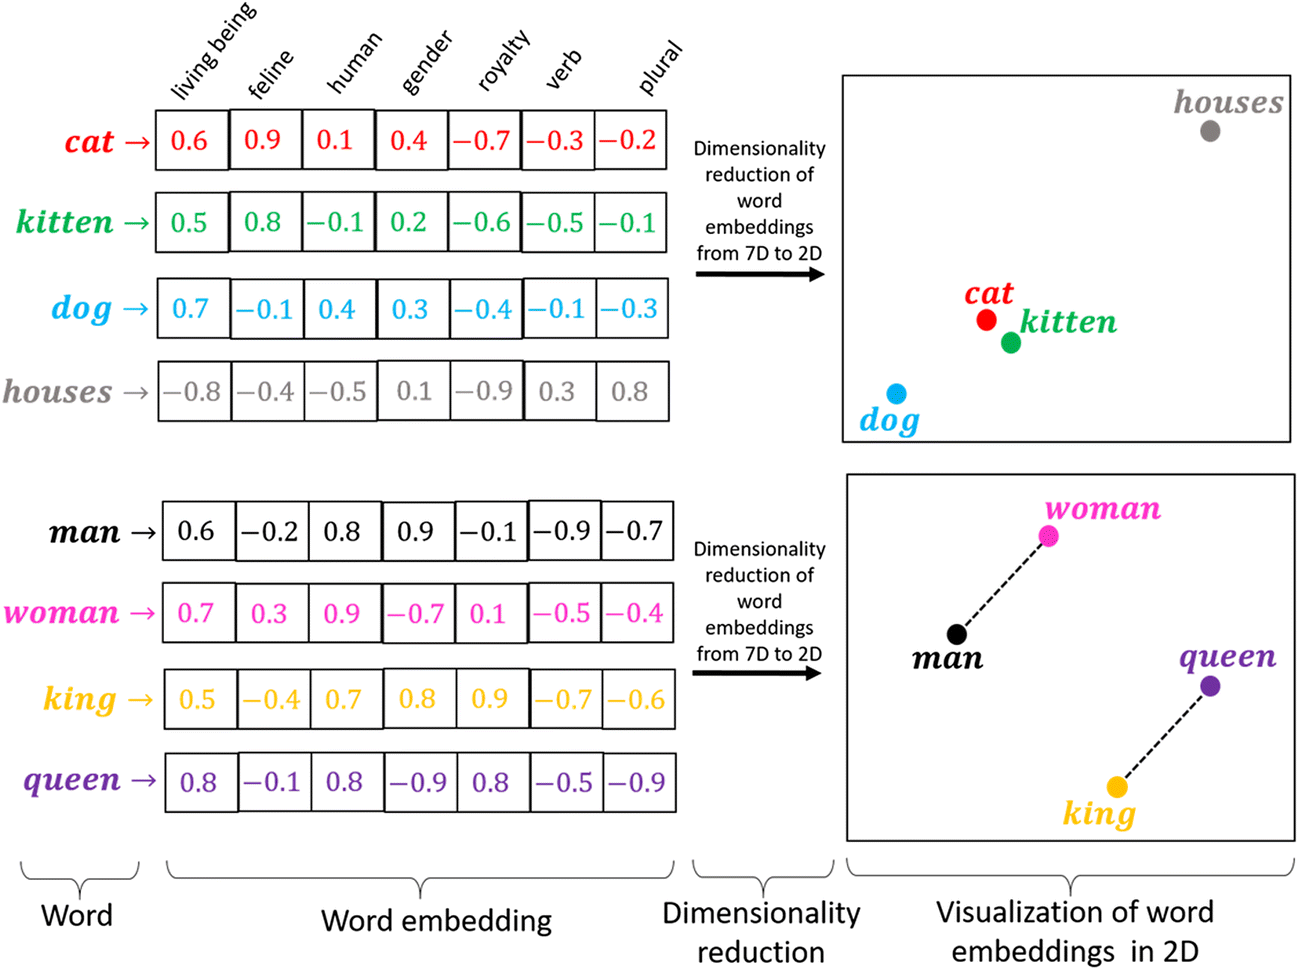

In [21]:
model = Word2Vec(corpus, vector_size= 100, window=5, min_count=5, sg=1)

**vector_size** --> __Word Embedding size (Number of features). (As a best practice, values like 50, 100, 300 are preferred.)__

The optimal value for vector_size may vary depending on your application. For example, values between 50-100 might be sufficient for simple tasks, while for more complex natural language processing tasks, a value of 200-300 or higher might be preferred.

__window (window_size) -->__ How many words on the left and right of the relevant token should be considered to capture semantic relationships?

__min_count=5 -->__ Exclude tokens that appear 5 or fewer times in the corpus from training.

__sg (Skip-gram) -->__ If sg=0, it means CBOW; if sg=1, it means Skip-gram. (Default=0)

For large corpora, CBOW works better, while Skip-gram performs better for smaller corpora. Since our dataset is small, we chose Skip-gram.

We set up our model above. To see the Word2Vec for a specific token, we give it to model Word2Vec (model.wv). A 100-dimensional Word Embedding has been created (All values are between -1 and 1):

---

**CBOW (Context to Predict Word)**

Looks at the words surrounding a target word and tries to predict what that word is.

**📌 For example:**

Sentence: "I am drinking coffee"

If the model is trying to find the word "coffee":

**👉 Input:** "I am drinking ..."

**👉 Output:** "coffee"

---

**Skip-gram (Word to Predict Context)**

Does the opposite: Given a word, it tries to predict the surrounding words.

**📌 For example:**

Sentence: "I am drinking coffee"

If the model is starting with the word "coffee":

**👉 Input:** "coffee"

**👉 Output:** "I", "am", "drinking"

In [23]:
model.wv['Sultan']

array([-0.52983296, -0.14170177,  0.17607279,  0.30247933, -0.16590443,
       -0.4276821 , -0.00657474,  0.5990656 , -0.18246654, -0.3027421 ,
       -0.08958255, -0.2939034 , -0.14763704, -0.12790076, -0.02929118,
       -0.24426498, -0.169175  , -0.36925364,  0.03509512, -0.30120537,
       -0.1554055 , -0.11557148,  0.21153371,  0.02990008,  0.01696253,
        0.0022841 ,  0.04921564, -0.06318723, -0.06803855,  0.08966931,
       -0.08184095,  0.35897908,  0.31362763, -0.11864468, -0.16086288,
        0.4589367 ,  0.03991993, -0.42089638, -0.2323491 , -0.41375455,
       -0.05605082, -0.25376025,  0.02848456, -0.3800156 ,  0.2522773 ,
        0.07036753, -0.1693248 ,  0.38179323,  0.19137242,  0.04944036,
        0.18752773,  0.05890563, -0.05981895,  0.02951538, -0.18145657,
       -0.02234846, -0.02243206, -0.03690521, -0.33237118, -0.04562977,
        0.09729677,  0.34879264, -0.10709386, -0.5276208 , -0.32052016,
       -0.10924879, -0.03100144,  0.27906728, -0.07344879,  0.04

In [25]:
model.wv.similarity('Sultan', 'Paşa')

0.9141206

The expression `model.wv.similarity('Sultan', 'Paşa')` measures the similarity between the words "Hoca" and "Paşa." If the returned value is 0.966635, it indicates that these two words have a very high degree of similarity.

A high similarity value shows that the words "Sultan" and "Paşa" were used in similar contexts in the training dataset and are close to each other in meaning. The Word2Vec model predicts such relationships by calculating the cosine similarity between word vectors. As the cosine similarity value approaches 1, the similarity between the two words increases.

This result can be useful in text analysis or natural language processing applications by utilizing the similarity between the words "Sultan" and "Paşa." For example, it can be used in tasks such as word matching, word recommendation, or semantic relationship analysis.

__model.wv.most_similar -->__ Returns the 10 most similar words to the given token. We can select a different number of tokens by modifying the `topn=10` parameter.

Words that can replace "sey" and the most frequent words used with "sey" such as 'haberim', 'bilgimiz', and 'sorunum' are selected as the closest words to "sey":

In [27]:
model.wv.most_similar('Sultan')

[('Kanuni', 0.9932041168212891),
 ("Süleyman'ın", 0.991253137588501),
 ('zevcesi', 0.9855735301971436),
 ("Selim'in", 0.976396381855011),
 ('validesi', 0.9687420129776001),
 ('II.', 0.9669452905654907),
 ('Yavuz', 0.9617297053337097),
 ("Mehmed'in", 0.95433109998703),
 ('kızı', 0.9521757364273071),
 ('Şehzade', 0.9498011469841003)]

As in this case, when the corpus is small, semantic relationships are established with the previous and next words. In larger corpora, more semantic relationships are built, allowing for predictions of more contextually similar words.

In [29]:
model.wv.most_similar('Paşa')

[('İbrahim', 0.9929491281509399),
 ('Mehmed', 0.9922046661376953),
 ('Ahmed', 0.9902506470680237),
 ('vakfiyesi:', 0.9899449348449707),
 ('Süleyman', 0.9889328479766846),
 ('Mustafa', 0.9882626533508301),
 ('Şah', 0.9878320693969727),
 ('oğlu', 0.9877969622612),
 ('Hüseyin', 0.987712025642395),
 ('bin', 0.9873363971710205)]

In [31]:
model.wv.most_similar('Rumeli')

[('Halil', 0.9959319829940796),
 ('Emini', 0.99592524766922),
 ('Veziriazam', 0.9954573512077332),
 ('nazırı', 0.9952753782272339),
 ('vasıtasıyla', 0.9951999187469482),
 ('tasarrufunda', 0.9951146245002747),
 ("Paşa'nın,", 0.9950945973396301),
 ('akçeye;', 0.9950747489929199),
 ("Bey'in,", 0.9950488209724426),
 ('Davud', 0.9949426651000977)]

In [33]:
model.wv.most_similar('Hacı')

[('b.', 0.993327260017395),
 ('Çelebi', 0.9927312731742859),
 ('Mehmed', 0.9924362897872925),
 ('Mahmud', 0.9918050169944763),
 ('Bey', 0.991097629070282),
 ('bin', 0.9900699257850647),
 ('Ahmed', 0.9891272187232971),
 ('Vakfiyesi:', 0.988203227519989),
 ('mütevelli', 0.9880630373954773),
 ('İbrahim', 0.9878664612770081)]

We saved the model we created:

In [35]:
model.save("word2vec")

The code `model.save("word2vec")` is used to save a Word2Vec model to disk. Word2Vec represents a word embedding model and contains the trained word embedding vectors. These vectors are typically used to represent words in large text data as numerical representations.

With the `model.save("word2vec")` code, the Word2Vec model you created will be saved as a file named "word2vec". You can later use this saved model file to reload the trained word embedding vectors or use them in another project.

---

To reload the model:

In [37]:
modelll = Word2Vec.load("word2vec")

You can use the saved Word2Vec model in the notebook.

In [39]:
modelll.wv['Saray']

array([-1.54825464e-01, -4.68806103e-02,  6.93242624e-02,  1.62468761e-01,
        1.38103950e-03, -2.56170183e-01,  1.45202607e-01,  3.39626282e-01,
       -1.70332283e-01, -4.75678258e-02, -1.19864792e-01, -7.77048096e-02,
        1.06951036e-02,  1.41252996e-04, -4.65508699e-02, -1.71793342e-01,
        2.17114672e-01, -1.96383640e-01,  5.39719909e-02, -3.06412220e-01,
        1.49220660e-01, -1.16502391e-02,  1.19107649e-01, -4.86376807e-02,
        4.07982580e-02,  2.70680822e-02, -1.18754350e-01, -1.99627709e-02,
       -1.95885710e-02,  4.94771544e-03, -2.44781598e-02,  1.13348633e-01,
        1.17883965e-01, -1.13659956e-01, -1.15013160e-01,  2.83782315e-02,
        2.12764014e-02, -1.76665798e-01, -1.51109278e-01, -2.24682614e-01,
       -5.73945977e-02, -9.96476561e-02,  1.09979890e-01, -5.13859279e-02,
        1.53072342e-01, -1.06318459e-01, -1.92580462e-01,  8.81966501e-02,
        1.71140581e-01,  5.20877950e-02,  6.44793808e-02, -3.63097806e-03,
       -1.71469480e-01,  

In [41]:
model.wv.most_similar('Saray')

[('oda', 0.9915995597839355),
 ('dükkanlarının', 0.9912296533584595),
 ('ağasının', 0.9911713004112244),
 ('951,', 0.9895492792129517),
 ('954,', 0.9879555702209473),
 ('956,', 0.986046552658081),
 ('oğulları,', 0.9845995306968689),
 ('ağasına', 0.9845567345619202),
 ('Enderun', 0.9839326739311218),
 ('Bir', 0.9835201501846313)]

<p style="background-color:steelblue;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>THANK YOU!</b></p>